# Tutorial Setup

1. Install git following instructions for your operating system: https://carpentries.github.io/workshop-template/#git
2. If you have python installed, follow these instructions to install `porder`: https://github.com/samapriya/porder#prerequisites
    - If you don't have python installed, follow the instructions for your operating system: https://carpentries.github.io/workshop-template/#python
    - most OS's come with python nowadays and you can use python 2 for this tutorial. If you don't have a package you can install it with `pip install package-name`. You can check if you have python by opening a terminal and running `python`
3. Download this repository and notebook with the terminal command: `git clone https://github.com/rbavery/porder_tutorial.git`
4. `cd porder_tutorial`
5. `jupyter lab` or `jupyter notebook`. If you don't have jupyter installed, install it with `pip install jupyterlab`

# First things first, what's this notebook thing?

For this tutorial we will be running terminal commands from within a jupyter notebook. A jupyter notebook allows you to mix code and markdown (basically, text) wihtin a single document. As we step through and execute the commands, take notes in a seperate markdown cell (like this one!). After the tutorial, refer back to your notebook or the [porder documentation](https://github.com/samapriya/porder) in case you get stuck using porder. You can use porder through your native shell or the notebook, but we will use the notebook today so that all the commands you run are saved and you can refer to them later.

You can turn a code cell into a markdown cell or vice-versa by using the menu bar above. Keyboard shortcuts for manipulating the jupyter notebook are listed in help, feel free to try these out as we go along. Typing "M" turns a cell to Markdown. "Y" turns it into a code cell

### Change the code cell below to a Markdown cell. What happened?

Before continuing through the notebook, make sure you have installed porder. If you had to install `porder` in a [conda environment](https://docs.conda.io/projects/conda/en/latest/user-guide/concepts/environments.html) then make sure you have also installed `ipykernel` in that environment. If any of this is confusing or you need help getting porder installed and usable in your notebook, get in touch with Ryan (ravery@ucsb.edu)

! makes the cell execute bash code instead of python code. Here we list out the files and folders in out current working directory (cwd). The cwd is the same as the directory where we started the jupyter notebook

In [1]:
!ls -F

data/		 planet_tutorial.qgz	san_pedro.geojson
environment.yml  porder_tutorial.ipynb	san_pedro_section.geojson
map.geojson	 README.md


All terminal programs available in your native shell are available through the notebook, including porder.

In [2]:
!porder -h

usage: porder [-h]
              {version,quota,shp2geojson,base64,simplify,idlist,difflist,idsplit,idcheck,bundles,order,ordersize,ostate,stats,download,multipart,multiproc}
              ...

Ordersv2 Simple Client

positional arguments:
  {version,quota,shp2geojson,base64,simplify,idlist,difflist,idsplit,idcheck,bundles,order,ordersize,ostate,stats,download,multipart,multiproc}
    version             Prints porder version and exists
    quota               Prints your Planet Quota Details
    shp2geojson         Convert all shapefiles in folder to GeoJSON
    base64              Base 64 encode a JSON file
    simplify            Simplifies geometry to number of vertices specified
                        using Visvalingam-Wyatt line simplification algorithm
    idlist              Get idlist using geometry & filters
    difflist            Checks the difference between local files and
                        available Planet assets
    idsplit             Splits ID list incase you w

Before using any of these porder commands, you'll need to authenticate using the `planet init` command. This is one spot where we can't use the notebook. Click the + sign in the upper left that represents "New Launcher". Launch a Terminal from that window that opens up when you click the +. Then run `planet init` in the Terminal. You will need your email and password for your Planet Account (If you don't have this, email Ryan at ravery@ucsb.edu, you'll need to be added as a departmental user).

There are a lot of commands available, but the ones I've used most often include:

1. `porder idlist` to search for planet imagery in an area of interest and create the list of ids used to order imagery
2. `porder order` to place the order
3. `porder multiproc` to download the order

We will run these 3 commands to order some 4-band 3.5 meter Planetscope imagery over the [San Pedro Riparian National Conservation Area](https://visit.sierravistaaz.gov/see-do/nature-science/san-pedro-riparian-national-conservation-area/)

If you would like to work with a different area for this tutorial, you can quickly draw a bounding box and downloa din geojson format using this tool: http://geojson.io/#map=2/20.0/0.0

To get help for a particular command, run that command with the `-h` flag

In [1]:
!porder idlist -h

usage: porder idlist [-h] --input INPUT --start START --end END --item ITEM
                     [--asset ASSET] --outfile OUTFILE [--cmin CMIN]
                     [--cmax CMAX] [--number NUMBER] [--overlap OVERLAP]
                     [--filters FILTERS [FILTERS ...]]

optional arguments:
  -h, --help            show this help message and exit

Required named arguments.:
  --input INPUT         Input geometry file for now geojson/json/kml
  --start START         Start date in format YYYY-MM-DD
  --end END             End date in format YYYY-MM-DD
  --item ITEM           Item Type PSScene4Band|PSOrthoTile|REOrthoTile etc
  --asset ASSET         Asset Type analytic, analytic_sr,visual etc
  --outfile OUTFILE     Output csv file

Optional named arguments:
  --cmin CMIN           Minimum cloud cover 0-1 represents 0 to 100
  --cmax CMAX           Maximum cloud cover 0-1 represents 0 to 100
  --number NUMBER       Total number of assets, give a large number if you are
                  

We will order a scene with 100% overlap in our study area, less than 5% cloud cover, and limit the number of assets returned to 1 for demonstration. Two of the more common mistakes is to not wrap arguments in quotes "" and using relative paths instead of absolute paths for the `--outfile` and  `--input` geojson. As you can see, a single order can have lots of flags and turn out to be very long, so make sure refer back to this notebook or the porder github page if you get stuck typing one of these out.

In [6]:
!porder idlist --input "/home/rave/planet_tutorial/san_pedro_section.geojson" --start "2019-06-01" --end "2019-06-08" --item "PSScene4Band" --asset "analytic_sr" --outfile "/home/rave/planet_tutorial/data/idlist.csv" --cmax ".05" --number "1" --overlap "100"


Running search for a maximum of: 1 assets
Total number of assets written to /home/rave/planet_tutorial/data/idlist.csv ===> 1
Total estimated cost to quota: 181 sqkm
Total estimated cost to quota if clipped: 181 sqkm


In [7]:
!porder order -h

usage: porder order [-h] --name NAME --idlist IDLIST --item ITEM --bundle
                    BUNDLE [--sid SID] [--boundary BOUNDARY]
                    [--projection PROJECTION] [--kernel KERNEL]
                    [--compression COMPRESSION] [--aws AWS] [--azure AZURE]
                    [--gcs GCS] [--op OP [OP ...]]

optional arguments:
  -h, --help            show this help message and exit

Required named arguments.:
  --name NAME           Order Name to be Submitted
  --idlist IDLIST       CSV idlist with item IDs
  --item ITEM           Item Type PSScene4Band|PSOrthoTile|REOrthoTile etc
  --bundle BUNDLE       Bundle Type: analytic, analytic_sr,analytic_sr_udm2

Optional named arguments:
  --sid SID             Subscription ID
  --boundary BOUNDARY   Boundary/geometry for clip operation geojson|json|kml
  --projection PROJECTION
                        Projection for reproject operation of type "EPSG:4326"
  --kernel KERNEL       Resampling kernel used "near", "bilinear", "

Below we submit the idlist.csv with the order command. Make sure to copy the url that is returned as we will use that in the download step. It should take about 5 minutes for the order to complete. We select the `analytic_sr_udm2` bundle, which comes with surface reflectance, metadata, and two versions of Planet's Usable Data Mask. There are many operations supported besides `email`, making this one of the more powerful commands for controlling the extent, quality, and kind of data you get back from Planet, so [check out the order documentation for more details](https://github.com/samapriya/porder#order)

In [8]:
!porder order --name "San Pedro Test" --idlist "/home/rave/planet_tutorial/data/idlist.csv" --item "PSScene4Band" --bundle "analytic_sr_udm2" --op email

Order created at https://api.planet.com/compute/ops/orders/v2/61c5e0a6-896c-4bca-9724-dabaa43e1c73 and url copied to clipboard


You should receive an email when your order is complete, but you can also check on the status of your order with the following command. Initially it will show that an order is running for for user, when it is ready to download, it will show 0 running orders for user.

In [10]:
!porder stats

Checking on all running orders...

Total queued order for organization: 0
Total running orders for organization: 1

Total queued orders for user: 0
Total running orders for user: 0


Once the order is complete, we can download it. This should go quick.

In [23]:
!porder multiproc -h

usage: porder multiproc [-h] [--url URL] [--local LOCAL] [--ext EXT]

optional arguments:
  -h, --help     show this help message and exit
  --url URL      order url you got for your order
  --local LOCAL  Output folder where ordered files will be exported

Optional named arguments:
  --ext EXT      File Extension to download


In [11]:
!porder multiproc --url "https://api.planet.com/compute/ops/orders/v2/6fa59a43-360b-4da7-9dc5-b9581fa2e3ad" --local "/home/rave/planet_tutorial/data/"

Polling with exponential backoff..
Order completed with status: success
Processing a url list with 0 items


File                                                                                                 Completed at        


Sweet! We have imagery. Each analytic_sr type Planetscope scene will come with a Usable Data Mask (udm), surface reflectance, and some metadata. Let's plot the image we downloaded with python! We will use xarray to load in the image data and plot it. rioxarray is an extension that preserve sgeospatial metadata and brings functionaility for geospatial operations like reprojecting. Both packages can be installed with `pip` or with `conda` from the conda-forge channel.

In [1]:
import xarray as xa
import rioxarray
%matplotlib inline
xa.set_options(display_style = "html")

In [2]:
san_pedro_sr = xa.open_rasterio("data/20190606_164931_104b_3B_AnalyticMS_SR.tif")
san_pedro_sr

<xarray.DataArray (band: 4, y: 4091, x: 8251)>
[135019364 values with dtype=uint16]
Coordinates:
  * band     (band) int64 1 2 3 4
  * y        (y) float64 3.509e+06 3.509e+06 3.509e+06 ... 3.497e+06 3.497e+06
  * x        (x) float64 5.668e+05 5.668e+05 5.668e+05 ... 5.915e+05 5.915e+05
Attributes:
    transform:                 (3.0, 0.0, 566751.0, 0.0, -3.0, 3509481.0)
    crs:                       +init=epsg:32612
    res:                       (3.0, 3.0)
    is_tiled:                  1
    nodatavals:                (0.0, 0.0, 0.0, 0.0)
    scales:                    (1.0, 1.0, 1.0, 1.0)
    offsets:                   (0.0, 0.0, 0.0, 0.0)
    descriptions:              ('blue', 'green', 'red', 'nir')
    AREA_OR_POINT:             Area
    TIFFTAG_DATETIME:          2019:06:06 16:49:31
    TIFFTAG_IMAGEDESCRIPTION:  {"atmospheric_correction": {"aerosol_model": "...

In [3]:
san_pedro_sr_bgr = san_pedro_sr.sel(band=slice(1,3)) # we make a new variable, keeping the blue, green, and red bands

In [4]:
san_pedro_sr_rgb = san_pedro_sr_bgr[::-1, ...] # reversing the order of the band axis from bgr to rgb

The in python we can use xarray's `imshow` function to plot single band or rgb data. `robust=True` clips the visualization to the minimum and maximum values in the dataset.

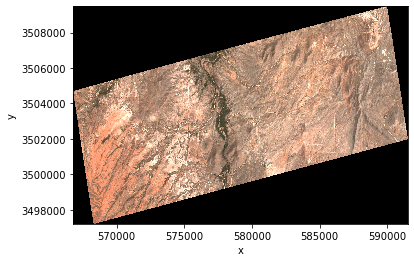

In [5]:
san_pedro_sr_rgb.plot.imshow(robust=True)

Let's take a look at it in QGIS so that we can compare our data to basemap layers.

Our scene looks pretty good once we normalize the display in QGIS by the maximum and minimum of the scene. And with a false color composite, the riparian forest clearly pops out and individual tree crowns are nearly distinguishable. To examine the metadata, the simplest way is to load the json in a tabular format, with rows and columns like an excel spreadsheet. To do this we can use pandas, the python data analysis package.

This comes with anaconda and if you don't have it, do `pip install pandas`

In [1]:
import pandas as pd
pd.read_json("data/20190606_164931_104b_metadata.json").drop("geometry", axis=1)

,id,type,properties
coordinates,20190606_164931_104b,Feature,NaN
type,20190606_164931_104b,Feature,NaN
acquired,20190606_164931_104b,Feature,2019-06-06T16:49:31.680516Z
anomalous_pixels,20190606_164931_104b,Feature,0
clear_confidence_percent,20190606_164931_104b,Feature,97
clear_percent,20190606_164931_104b,Feature,100
cloud_cover,20190606_164931_104b,Feature,0
cloud_percent,20190606_164931_104b,Feature,0
columns,20190606_164931_104b,Feature,8250
epsg_code,20190606_164931_104b,Feature,32612


If you have questions about the metadata attributes,a good place to submit questions is the [Planet Community Forum](https://support.planet.com/hc/en-us/community/topics/). You can find more tutorials on working with Planet imagery, exploring the usable data mask, and more at the Developer Resource Center: https://developers.planet.com/planetschool/

Keep in mind that some of the tutorials listed are newer than others. Anything referencing the Version 1 API is old, and it's best to use porder instead. If you'd like advice about which resources to check out next or have questions about how to use Planet in your research, talk to Ryan (ravery@ucsb.edu).